In [1]:
import numpy as np
import pyswarms as ps
from pyswarms.utils.functions import single_obj as fx
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)
from pyswarms.utils.plotters.formatters import Mesher, Designer

import matplotlib.pyplot as plt
from matplotlib import animation, rc
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg' 
rc('animation', html='html5')
%matplotlib inline
from IPython.display import HTML, Image

%load_ext autoreload
%autoreload 2

In [2]:
def woa(func, lower_bound, upper_bound, n_whales=50, maxiter=100, b=1, dim=2, show_progress=True):
    pos_history = []
    score_history = []

    #Initialize the positions of search agents
    whales_pos = np.random.uniform(0, 1, (n_whales, dim)) * (upper_bound - lower_bound) + lower_bound

    # initialize position vector and score for the leader
    leader_pos = np.zeros(dim)
    leader_score = float("inf")

    for t in range(maxiter):
        pos_history.append(whales_pos.copy())

        whales_scores = func(whales_pos)

        best_whale = np.argmin(whales_scores)
        best_score = whales_scores[best_whale]

        if best_score < leader_score:
            leader_score = best_score
            leader_pos = whales_pos[best_whale].copy()

        score_history.append(leader_score)

        a = 2 - t * (2 / maxiter)  # decreases linearly fron 2 to 0
        a2 = -1 + t * (-1 / maxiter)

        # Update the Position of search agents 
        for i in range(n_whales):
            r1 = np.random.uniform(0, 1)
            r2 = np.random.uniform(0, 1)

            A = 2 * a * r1 - a
            C = 2 * r2

            l = (a2 - 1) * np.random.uniform(0, 1) + 1
            p = np.random.uniform(0, 1)

            if p < 0.5:
                if np.absolute(A) >= 1:
                    rand_whale = whales_pos[np.random.randint(n_whales)]
                    D = np.absolute(C * rand_whale - whales_pos[i])
                    whales_pos[i] = rand_whale - A*D

                elif np.absolute(A) < 1:
                    D = np.absolute(C * leader_pos - whales_pos[i])
                    whales_pos[i] = leader_pos - A*D

            elif p >= 0.5:
                D = np.absolute(leader_pos - whales_pos[i])
                whales_pos[i] = D * np.exp(b*l) * np.cos(2*np.pi*l) + leader_pos

        whales_pos = whales_pos.clip(lower_bound, upper_bound)

        if show_progress and t % 10 == 0:
               print(['At iteration '+ str(t) + ' the best fitness is '+ str(leader_score)]);
    
    return leader_pos, leader_score, pos_history, score_history

In [3]:
max_bound = 5 * np.ones(2)
min_bound = - max_bound

best_pos, best_score, pos_history, score_history = woa(fx.rastrigin_func, min_bound, max_bound, 50, 100)

['At iteration 0 the best fitness is 5.299254590842311']
['At iteration 10 the best fitness is 0.016466542245723303']
['At iteration 20 the best fitness is 5.285879495886547e-06']
['At iteration 30 the best fitness is 1.0274447959091049e-11']
['At iteration 40 the best fitness is 5.897504706808832e-13']
['At iteration 50 the best fitness is 0.0']
['At iteration 60 the best fitness is 0.0']
['At iteration 70 the best fitness is 0.0']
['At iteration 80 the best fitness is 0.0']
['At iteration 90 the best fitness is 0.0']


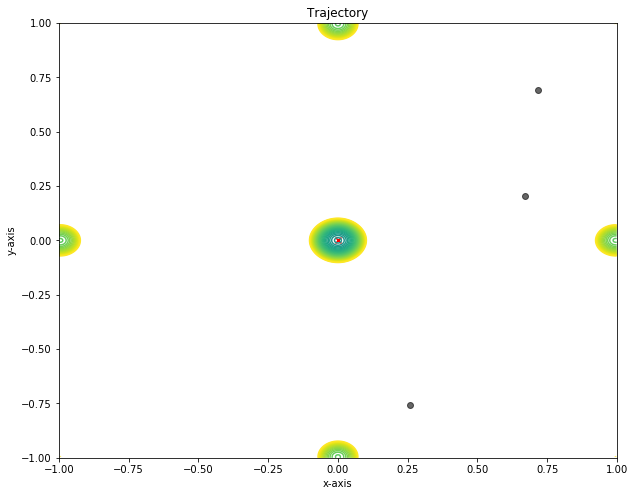

In [4]:
m = Mesher(func=fx.rastrigin_func)

animation = plot_contour(pos_history=pos_history,
                         mesher=m,
                         mark=(0,0))

HTML(animation.to_html5_video())

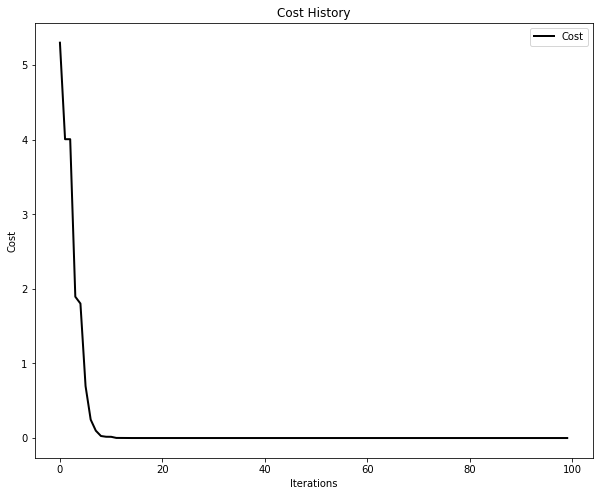

In [5]:
plot_cost_history(cost_history=score_history)
plt.show()

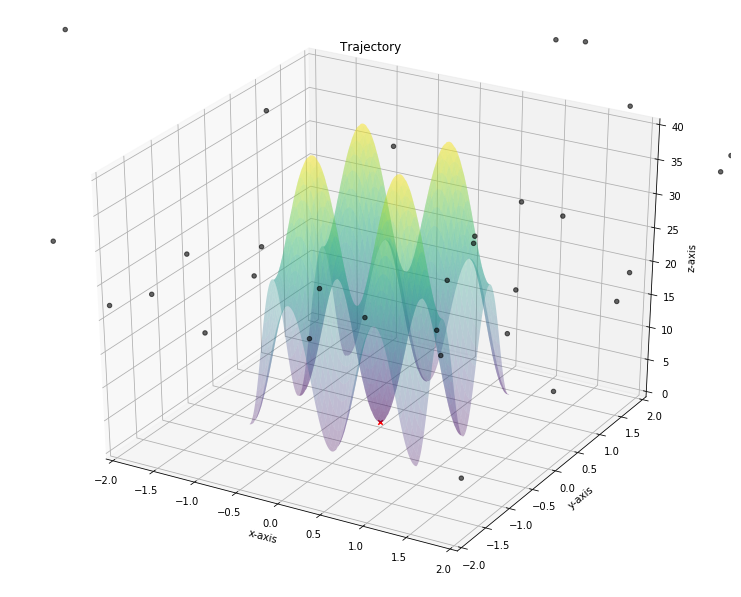

In [6]:
pos_history_3d = m.compute_history_3d(pos_history)

d = Designer(limits=[(-2, 2), (-2, 2), (0, 40)], label=['x-axis', 'y-axis', 'z-axis'])

animation3d = plot_surface(pos_history=pos_history_3d,
                           mesher=m, designer=d,     
                           mark=(0,0,0))

HTML(animation3d.to_html5_video())

In [7]:
def measure(func, min_bound, max_bound, whales_nums, maxiters, bs, repeats=10):
    data = np.zeros((len(whales_nums), len(maxiters), len(bs), 5))
    for i, n_whale in enumerate(whales_nums):
        for j, maxiter in enumerate(maxiters):
            for k, b in enumerate(bs):
                scores = []
                for _ in range(repeats):
                    best_pos, best_score, pos_history, score_history = woa(func, min_bound, max_bound, n_whale, maxiter, b, show_progress=False)
                    scores.append(best_score)

                data[i, j, k] = [np.mean(scores), np.median(scores), np.min(scores), np.max(scores), np.std(scores)]

                print('Whales: {}, iterations: {}, b: {}'.format(n_whale, maxiter, b),
                      '\n\tmean:   {:0.5}'.format(np.mean(scores)),
                      '\n\tmedian: {:0.5}'.format(np.median(scores)),
                      '\n\tmin:    {:0.5}'.format(np.min(scores)),
                      '\n\tmax:    {:0.5}'.format(np.max(scores)),
                      '\n\tstd:    {:0.5}'.format(np.std(scores)))

    return data

In [8]:
whales = [1,10,20,50,500]
iterations = [10,50,100,200]
bs = [0,1,5,10,100]

data = measure(fx.rastrigin_func, min_bound, max_bound, whales, iterations, bs)

Whales: 1, iterations: 10, b: 0 
	mean:   20.74 
	median: 12.858 
	min:    1.1834 
	max:    50.0 
	std:    15.928
Whales: 1, iterations: 10, b: 1 
	mean:   15.343 
	median: 15.599 
	min:    1.8798 
	max:    32.682 
	std:    9.7125
Whales: 1, iterations: 10, b: 5 
	mean:   19.539 
	median: 17.585 
	min:    2.6287 
	max:    49.775 
	std:    13.08
Whales: 1, iterations: 10, b: 10 
	mean:   17.576 
	median: 18.219 
	min:    5.4311 
	max:    32.933 
	std:    8.707
Whales: 1, iterations: 10, b: 100 
	mean:   21.507 
	median: 19.987 
	min:    0.0020394 
	max:    36.141 
	std:    10.389
Whales: 1, iterations: 50, b: 0 
	mean:   7.4054 
	median: 5.0372 
	min:    2.6592e-09 
	max:    31.849 
	std:    9.2467
Whales: 1, iterations: 50, b: 1 
	mean:   8.8643 
	median: 6.7513 
	min:    0.039418 
	max:    20.83 
	std:    8.1733
Whales: 1, iterations: 50, b: 5 
	mean:   6.1232 
	median: 3.6857 
	min:    2.5622e-05 
	max:    23.314 
	std:    7.5927
Whales: 1, iterations: 50, b: 10 
	mean:   4.8236 
	me

Whales: 50, iterations: 50, b: 10 
	mean:   0.19899 
	median: 1.35e-13 
	min:    0.0 
	max:    1.9899 
	std:    0.59698
Whales: 50, iterations: 50, b: 100 
	mean:   0.29893 
	median: 1.3856e-13 
	min:    0.0 
	max:    1.9935 
	std:    0.63806
Whales: 50, iterations: 100, b: 0 
	mean:   3.5527e-16 
	median: 0.0 
	min:    0.0 
	max:    3.5527e-15 
	std:    1.0658e-15
Whales: 50, iterations: 100, b: 1 
	mean:   7.1054e-16 
	median: 0.0 
	min:    0.0 
	max:    7.1054e-15 
	std:    2.1316e-15
Whales: 50, iterations: 100, b: 5 
	mean:   7.1054e-16 
	median: 0.0 
	min:    0.0 
	max:    7.1054e-15 
	std:    2.1316e-15
Whales: 50, iterations: 100, b: 10 
	mean:   0.0 
	median: 0.0 
	min:    0.0 
	max:    0.0 
	std:    0.0
Whales: 50, iterations: 100, b: 100 
	mean:   0.0 
	median: 0.0 
	min:    0.0 
	max:    0.0 
	std:    0.0
Whales: 50, iterations: 200, b: 0 
	mean:   0.0 
	median: 0.0 
	min:    0.0 
	max:    0.0 
	std:    0.0
Whales: 50, iterations: 200, b: 1 
	mean:   0.0 
	median: 0.0 
	min

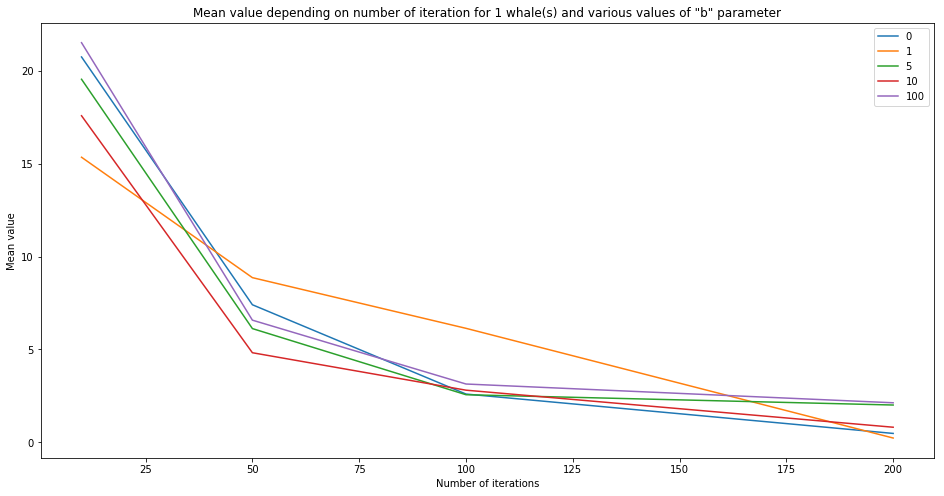

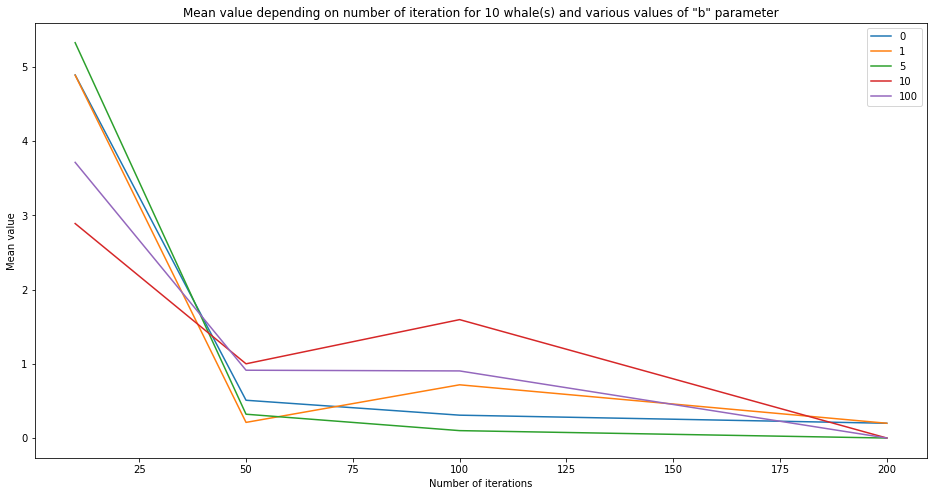

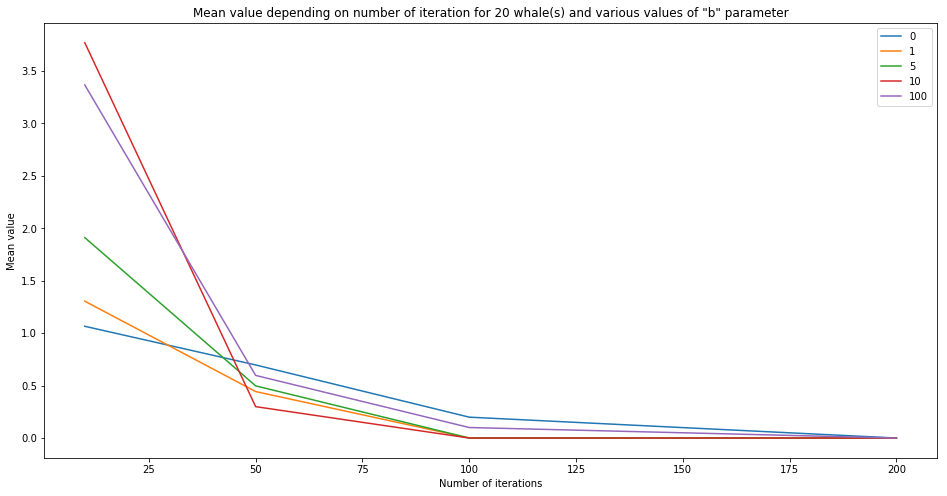

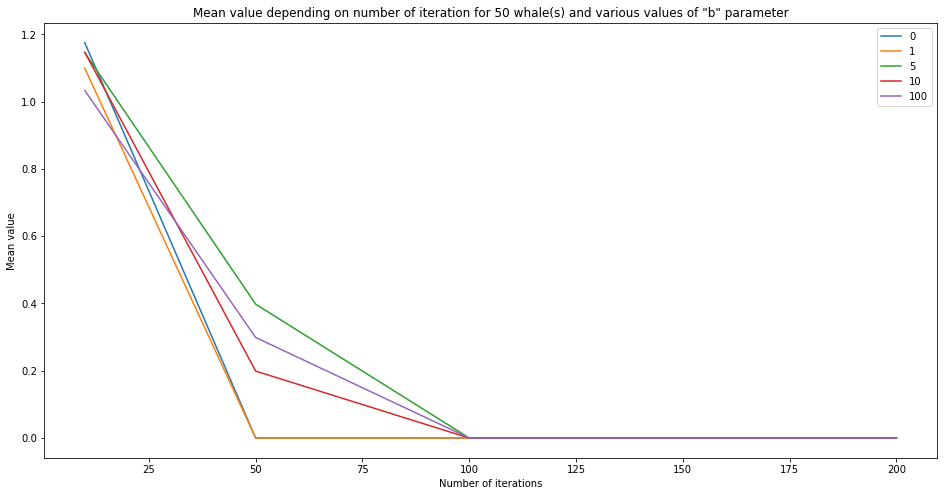

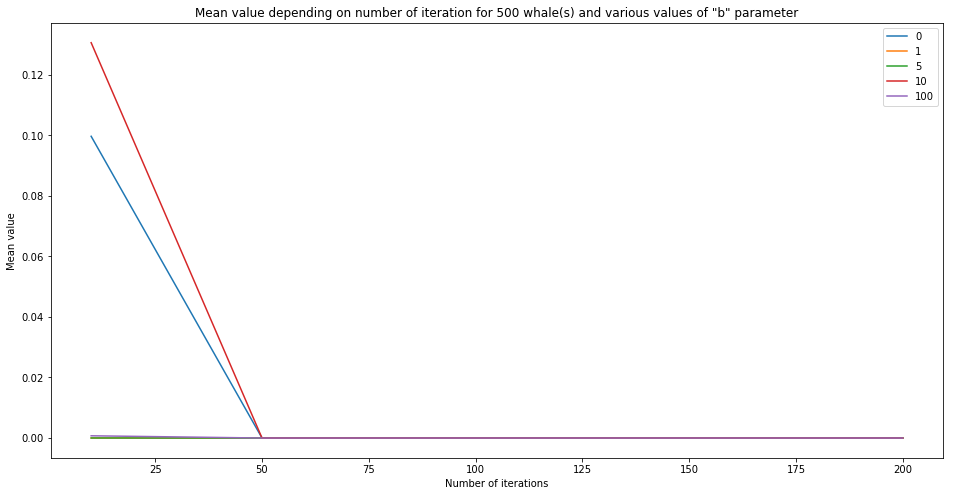

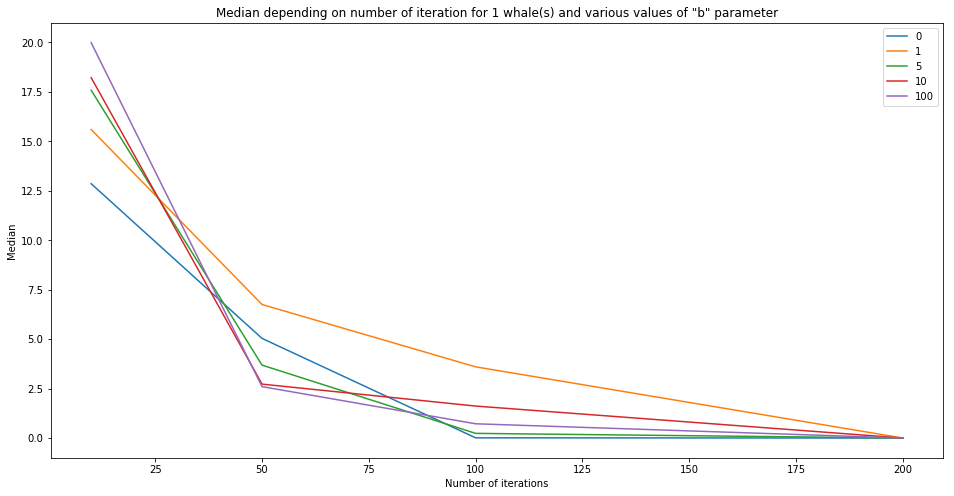

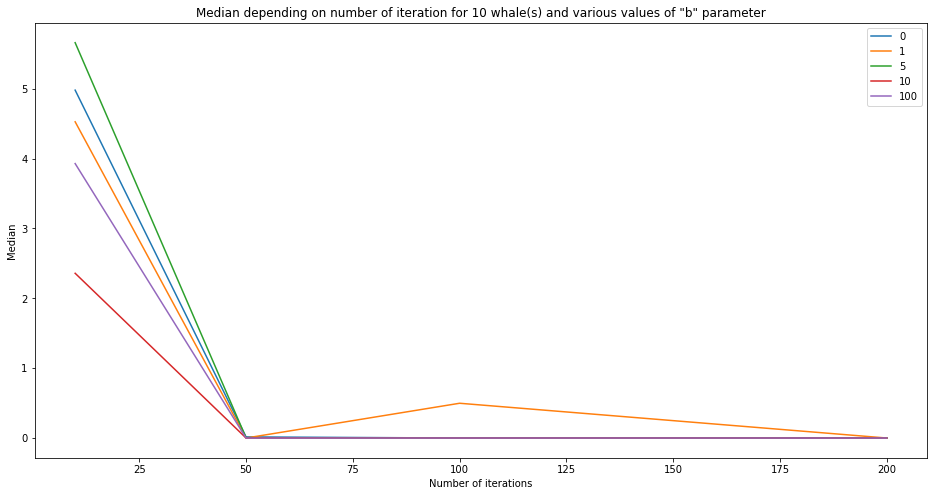

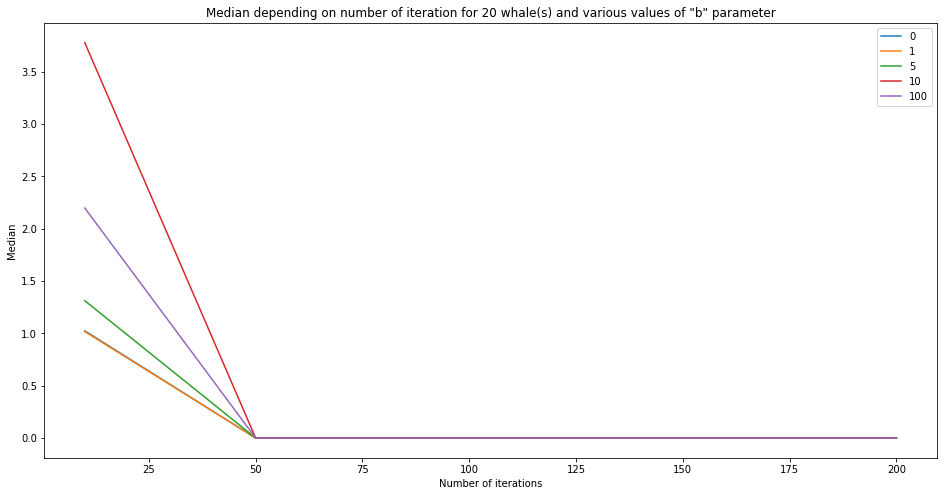

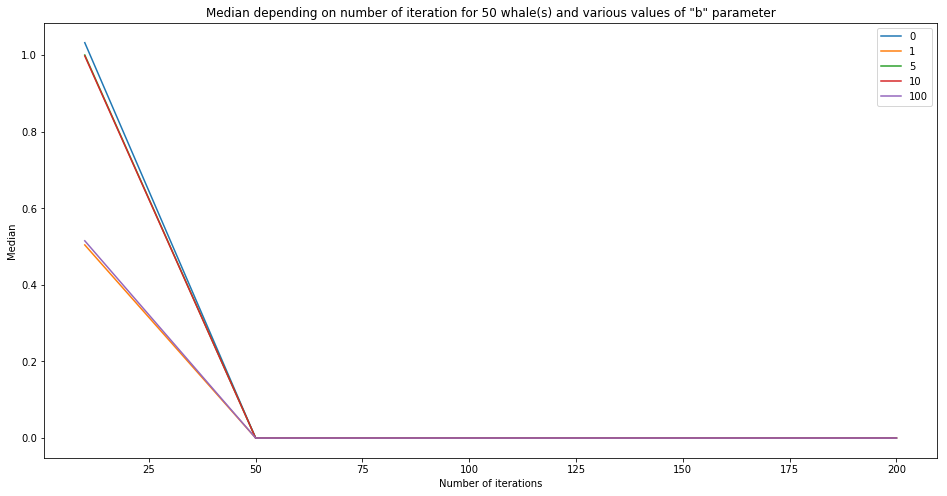

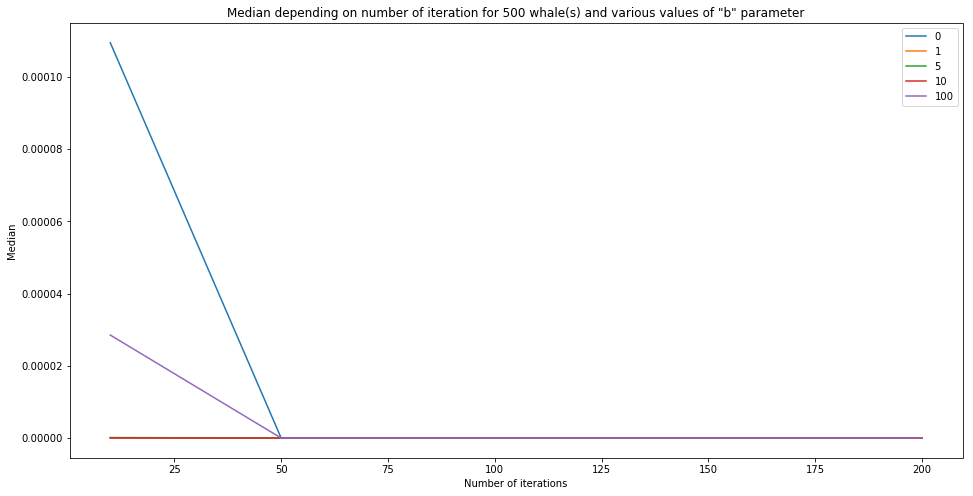

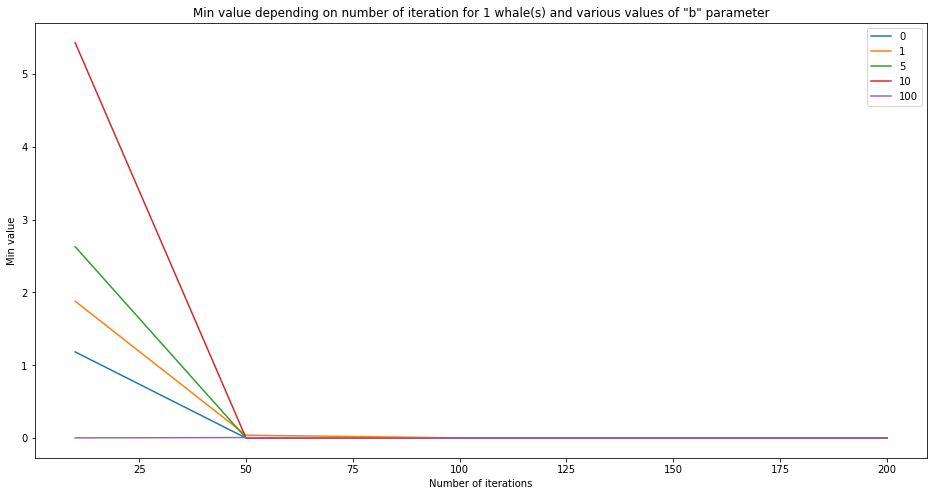

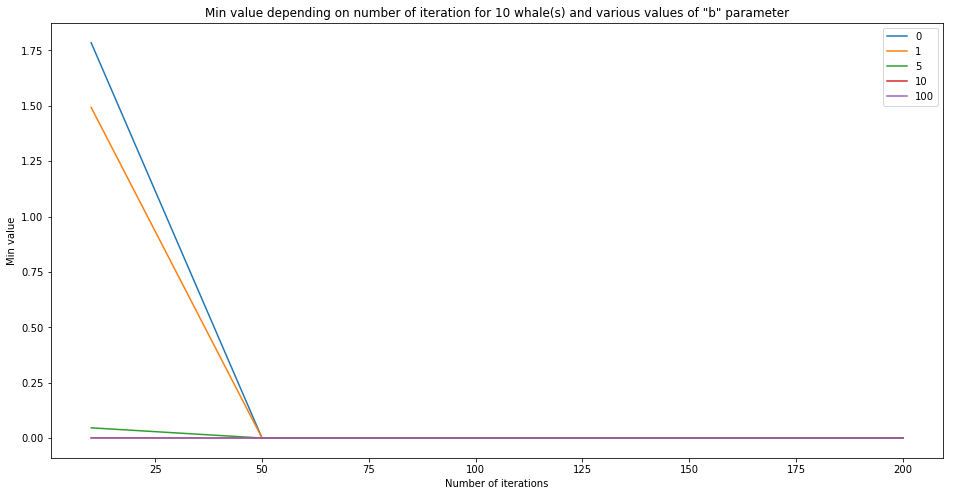

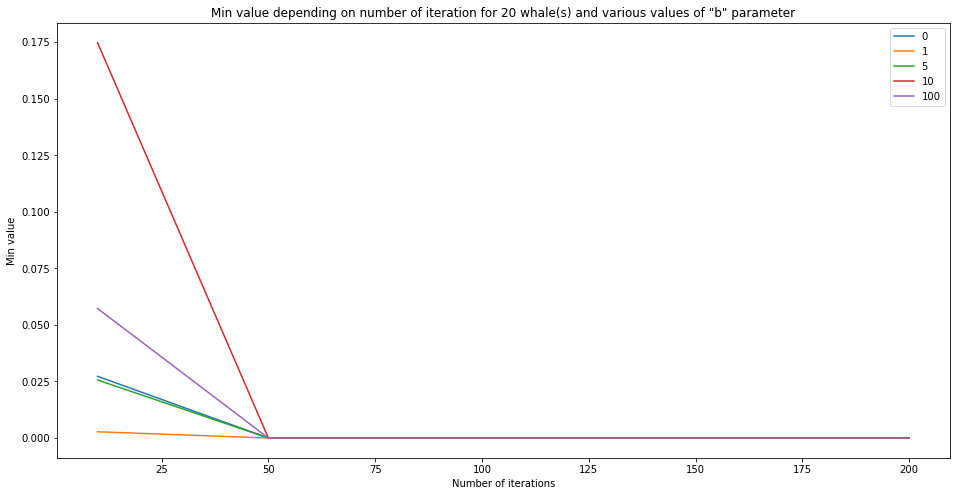

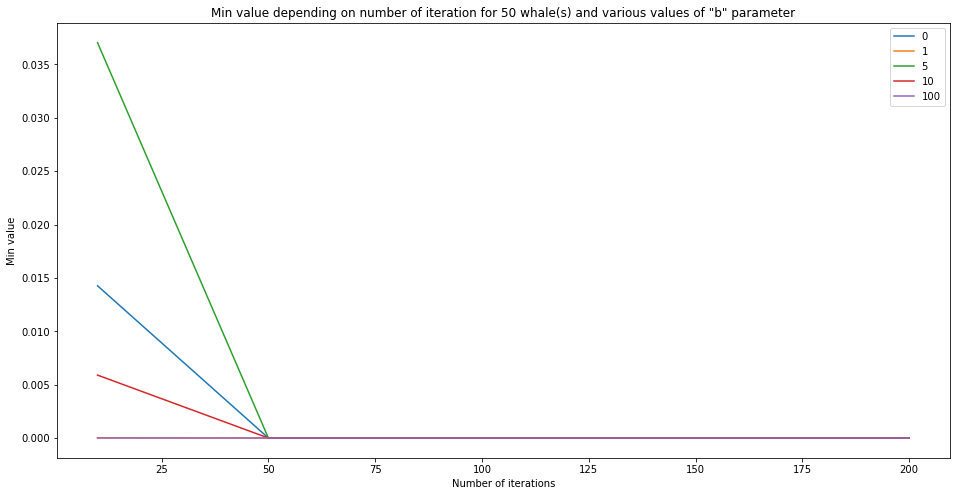

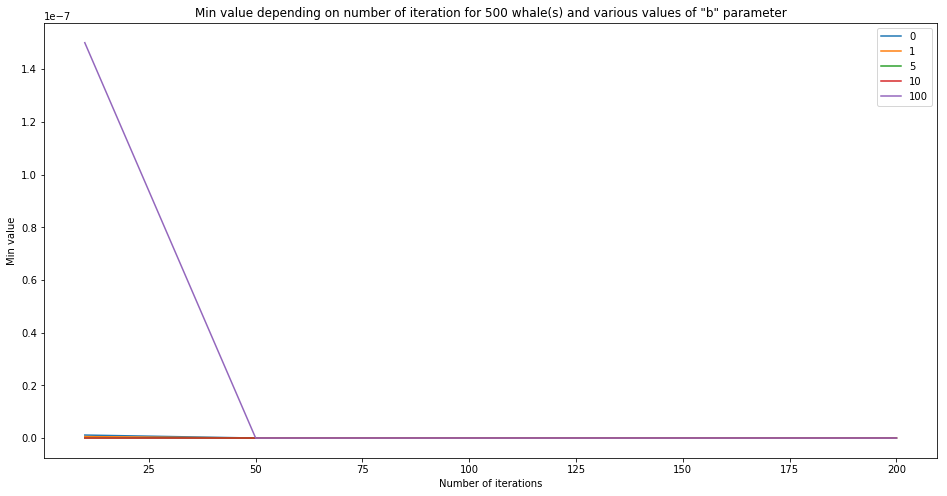

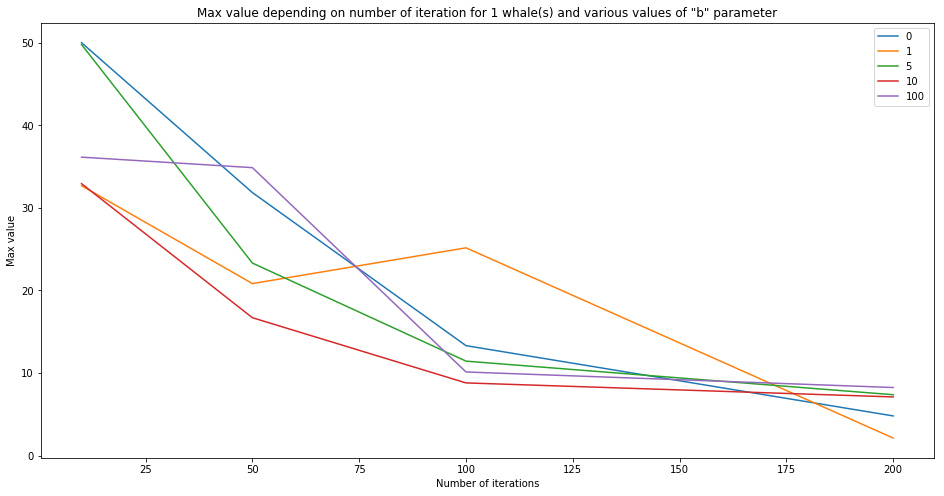

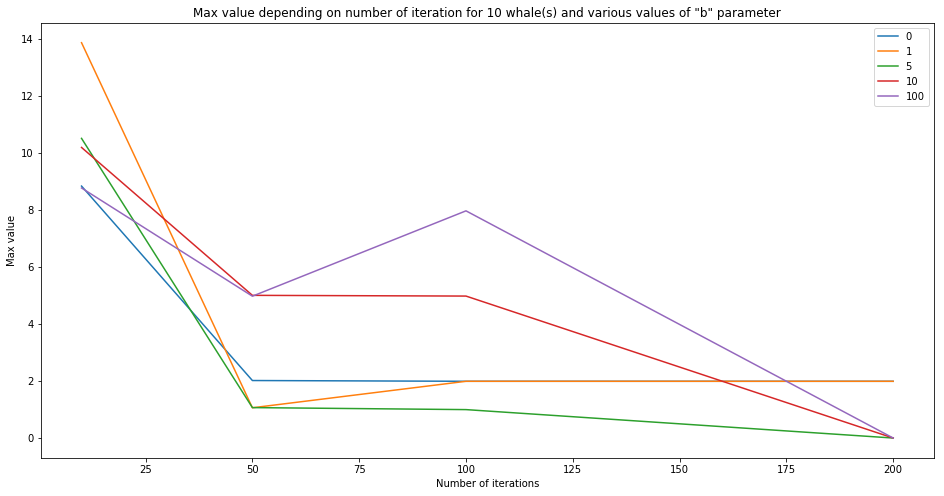

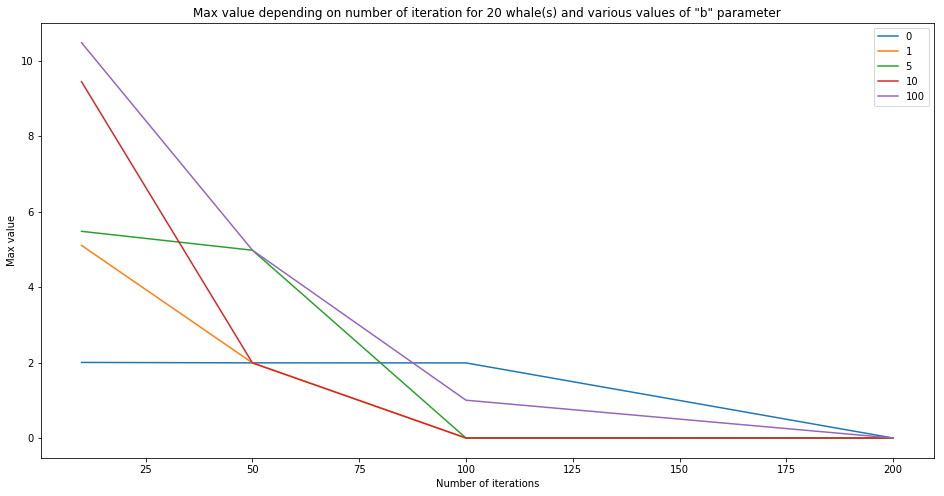

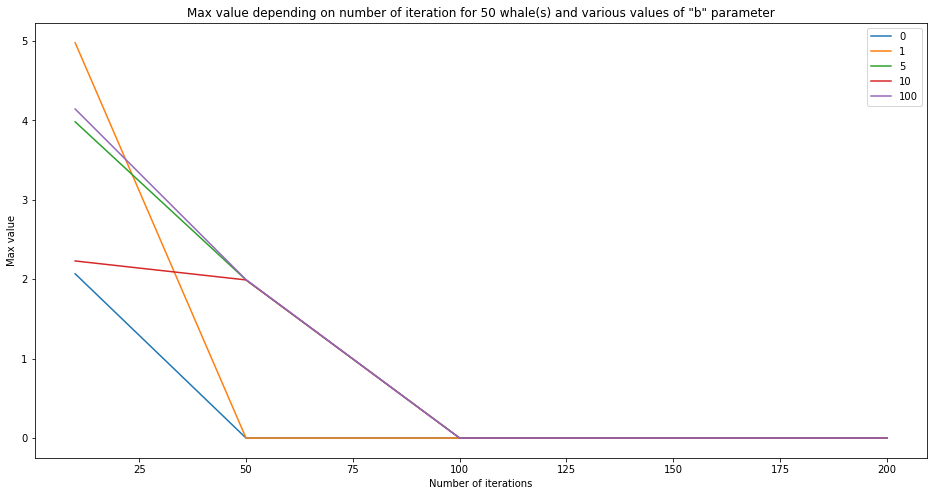

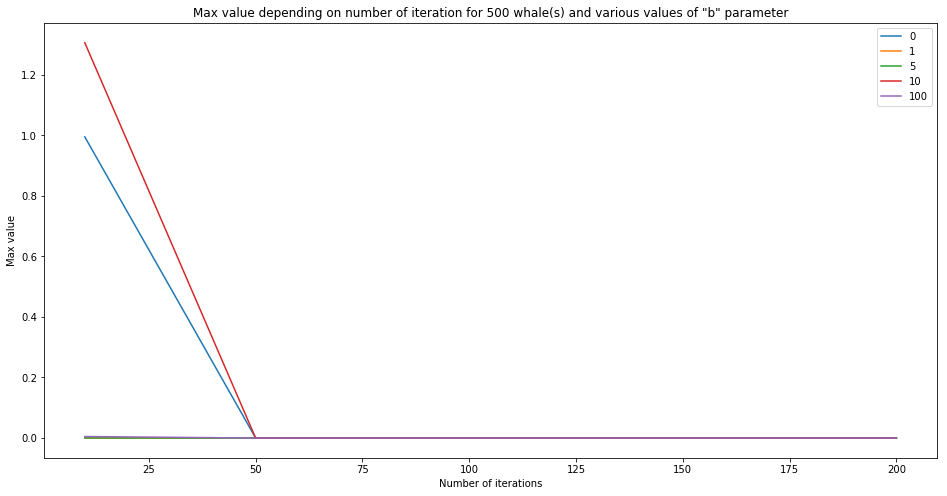

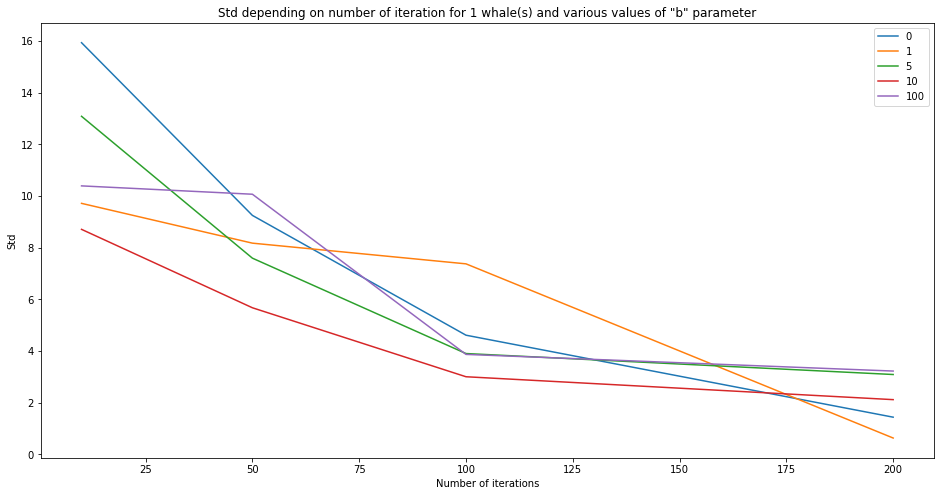

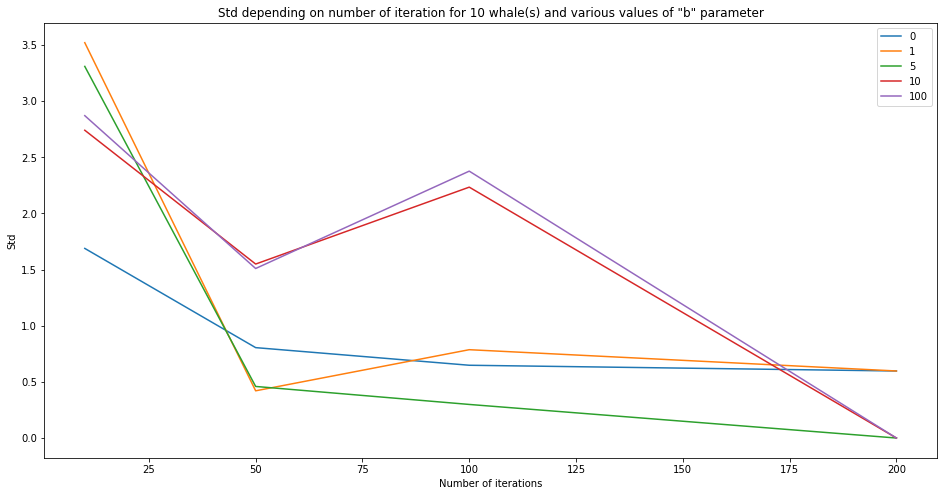

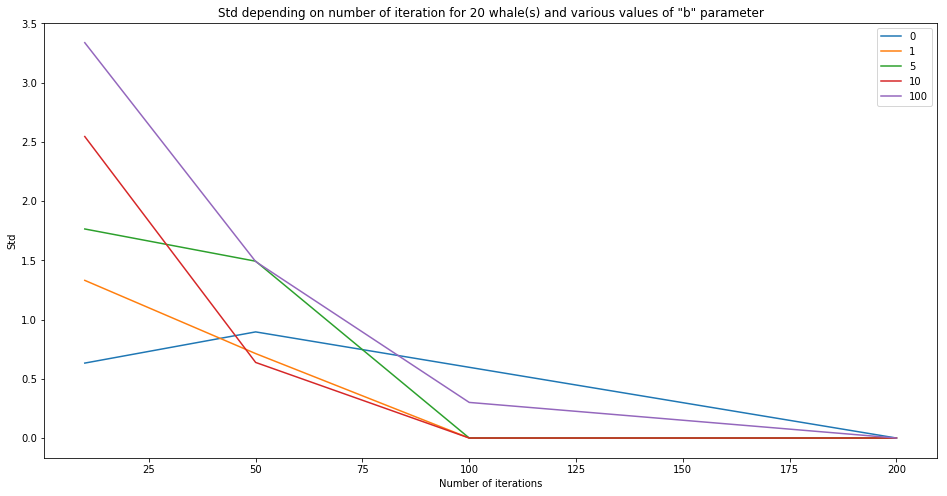

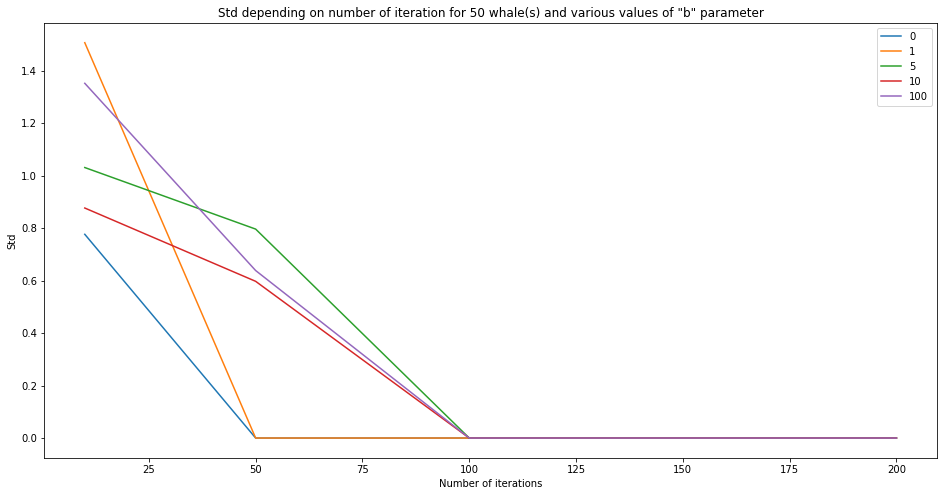

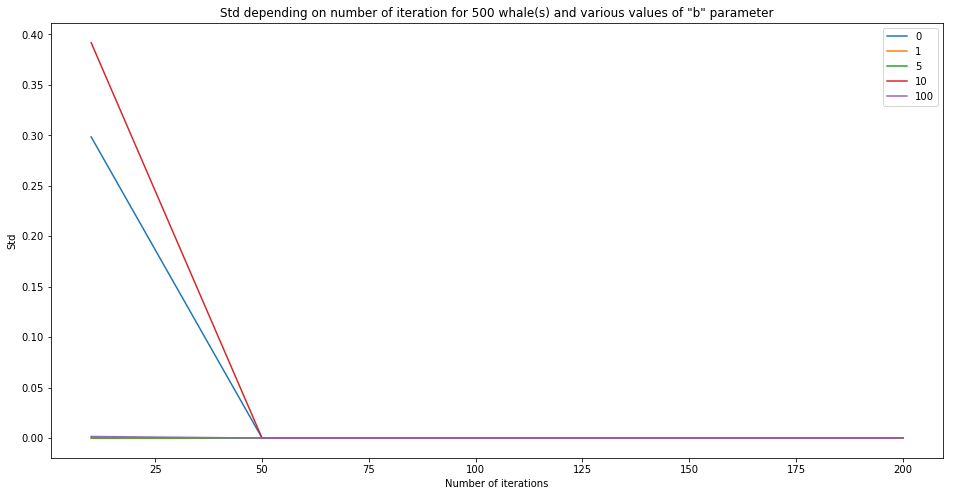

In [9]:
params = ['mean value', 'median', 'min value', 'max value', 'std']

for k, param in enumerate(params):
    for i, n_whales in enumerate(whales):
        plt.figure(figsize=(16, 8))
        for j, b in enumerate(bs):
            plt.plot(iterations, data[i, :, j, k], label=b)

        plt.xlabel('Number of iterations')
        plt.ylabel(param.capitalize())
        plt.title('{} depending on number of iteration for {} whale(s) and various values of "b" parameter'.format(param.capitalize(), n_whales))
        plt.legend()
        plt.show()